# Dataset 1 Pre Processing


## Table of Contents

- [Read and explore the data](#read)
- [Plot the distribution of features](#distribution)
- [Evaluate correlations](#correlation)
- [Save data to csv file](#save)

<a name="read"></a>
## Read and explore the data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the data
data_test = pd.read_csv('../1_Data/from_source/datatest.csv', index_col = 0)
data_test.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,02/02/2015 14:19,23.7000,26.272,585.200000,749.200000,0.004764,1
141,02/02/2015 14:19,23.7180,26.290,578.400000,760.400000,0.004773,1
142,02/02/2015 14:21,23.7300,26.230,572.666667,769.666667,0.004765,1
143,02/02/2015 14:22,23.7225,26.125,493.750000,774.750000,0.004744,1
144,02/02/2015 14:23,23.7540,26.200,488.600000,779.000000,0.004767,1


In [3]:
# dataframe shape
data_test.shape

(2665, 7)

In [4]:
# check indexes
data_test.index

Int64Index([ 140,  141,  142,  143,  144,  145,  146,  147,  148,  149,
            ...
            2795, 2796, 2797, 2798, 2799, 2800, 2801, 2802, 2803, 2804],
           dtype='int64', length=2665)

In [5]:
# check data types
data_test.dtypes

date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object

The only categorical variable there is in this dataset is the date, the other features are already in numerical format.<br /> So let's convert the date to date type. 

In [6]:
# convert date column to date data type
data_test['date'] = pd.to_datetime(data_test['date'])
data_test.dtypes

date             datetime64[ns]
Temperature             float64
Humidity                float64
Light                   float64
CO2                     float64
HumidityRatio           float64
Occupancy                 int64
dtype: object

In [7]:
# general overview
data_test.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,21.433876,25.353937,193.227556,717.906470,0.004027,0.364728
std,1.028024,2.436842,250.210906,292.681718,0.000611,0.481444
min,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,20.650000,23.260000,0.000000,466.000000,0.003529,0.000000
50%,20.890000,25.000000,0.000000,580.500000,0.003815,0.000000
75%,22.356667,26.856667,442.500000,956.333333,0.004532,1.000000
max,24.408333,31.472500,1697.250000,1402.250000,0.005378,1.000000


In [9]:
# checking for missing values
data_test.isnull().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

There are no missing values. <br />

The dataset is labeled as 0s and 1s:
- 0 = room non occupied
- 1 = room occupied. <br />

Let's check the frequency of each class.

In [10]:
# check the frequency of each class
data_test['Occupancy'].value_counts()

0    1693
1     972
Name: Occupancy, dtype: int64

In [16]:
occupied = data_test[data_test['Occupancy'] == 1]
nonOccu = data_test[data_test['Occupancy'] == 0]

x = (len(occupied)/data_test.shape[0]) * 100
y = (len(nonOccu)/data_test.shape[0]) * 100

print(f'occupied = {x:.2f} %')
print(f'non occupied = {y:.2f} %')

occupied = 36.47 %
non occupied = 63.53 %


In [19]:
ratio = y / x

print(f'There are {ratio:.2f} times more non occupied instances than occupied.')

There are 1.74 times more non occupied instances than occupied.


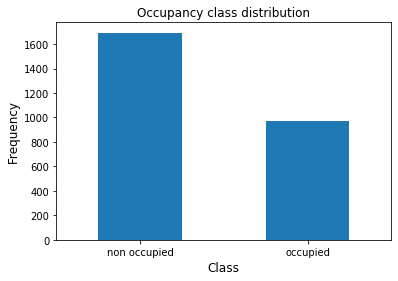

In [27]:
# plot the Occupancy class against the Frequency
labels = ['non occupied','occupied']
classes = pd.value_counts(data_test['Occupancy'], sort = True)
classes.plot(kind = 'bar', rot = 0)
plt.title("Occupancy class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
plt.show()

In [20]:
# check for duplicates
data_test.date.duplicated().sum()

534

In [21]:
# check the duplicated rows
data_test[data_test.date.duplicated()]

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
141,2015-02-02 14:19:00,23.718,26.2900,578.400000,760.400000,0.004773,1
145,2015-02-02 14:23:00,23.760,26.2600,568.666667,790.000000,0.004779,1
147,2015-02-02 14:25:00,23.754,26.2900,509.000000,797.000000,0.004783,1
153,2015-02-02 14:31:00,23.700,26.7000,469.000000,845.333333,0.004842,1
160,2015-02-02 14:38:00,23.640,27.1000,473.000000,908.800000,0.004898,1
...,...,...,...,...,...,...,...
2787,2015-04-02 10:25:00,24.100,25.9580,783.400000,1173.400000,0.004822,1
2789,2015-04-02 10:27:00,24.100,25.8925,797.500000,1156.250000,0.004810,1
2796,2015-04-02 10:34:00,24.218,25.9120,805.000000,1152.400000,0.004848,1
2800,2015-04-02 10:38:00,24.290,25.7000,808.000000,1150.250000,0.004829,1


There are records from the same day but different time.

In [22]:
# check the date column range
print(data_test['date'].min())
print(data_test['date'].max())

2015-02-02 14:19:00
2015-04-02 10:43:00


In [23]:
# set date to index
data_test_dateidx = data_test.set_index('date')
data_test_dateidx.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
2015-02-02 14:19:00,23.7180,26.290,578.400000,760.400000,0.004773,1
2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [24]:
# check the index
data_test_dateidx.index

DatetimeIndex(['2015-02-02 14:19:00', '2015-02-02 14:19:00',
               '2015-02-02 14:21:00', '2015-02-02 14:22:00',
               '2015-02-02 14:23:00', '2015-02-02 14:23:00',
               '2015-02-02 14:25:00', '2015-02-02 14:25:00',
               '2015-02-02 14:26:00', '2015-02-02 14:28:00',
               ...
               '2015-04-02 10:34:00', '2015-04-02 10:34:00',
               '2015-04-02 10:36:00', '2015-04-02 10:37:00',
               '2015-04-02 10:38:00', '2015-04-02 10:38:00',
               '2015-04-02 10:40:00', '2015-04-02 10:40:00',
               '2015-04-02 10:41:00', '2015-04-02 10:43:00'],
              dtype='datetime64[ns]', name='date', length=2665, freq=None)

<a name="distribution"></a>
## Plot the distribution of features

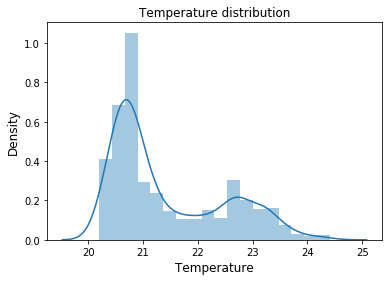

In [32]:
# distribution of Temperature
temperature = [data_test_dateidx['Temperature'].values]
sns.distplot(temperature)
plt.title("Temperature distribution")
plt.xlabel("Temperature", fontsize = 12)
plt.ylabel("Density", fontsize = 12)
plt.show()

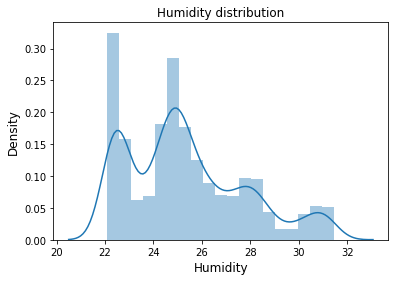

In [33]:
# distribution of Humidity
humidity = [data_test_dateidx['Humidity'].values]
sns.distplot(humidity)
plt.title("Humidity distribution")
plt.xlabel("Humidity", fontsize = 12)
plt.ylabel("Density", fontsize = 12)
plt.show()

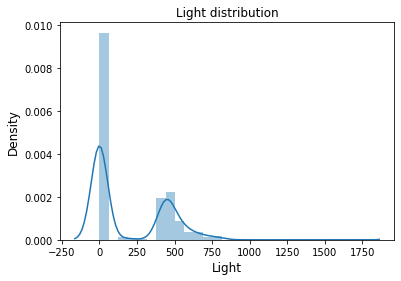

In [34]:
# distribution of Light
light = [data_test_dateidx['Light'].values]
sns.distplot(light)
plt.title("Light distribution")
plt.xlabel("Light", fontsize = 12)
plt.ylabel("Density", fontsize = 12)
plt.show()

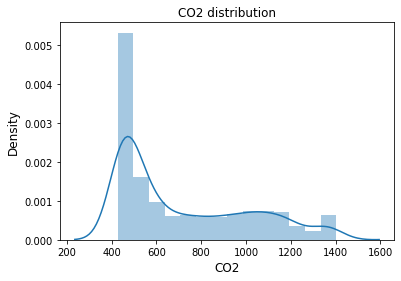

In [35]:
# distribution of CO2
co2 = [data_test_dateidx['CO2'].values]
sns.distplot(co2)
plt.title("CO2 distribution")
plt.xlabel("CO2", fontsize = 12)
plt.ylabel("Density", fontsize = 12)
plt.show()

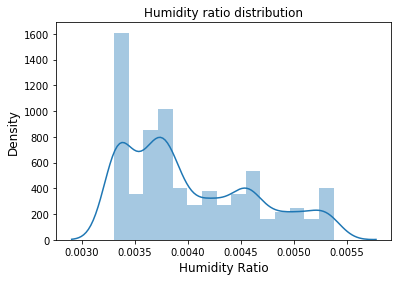

In [36]:
# distribution of Humidity Ratio
hum_ratio = [data_test_dateidx['HumidityRatio'].values]
sns.distplot(hum_ratio)
plt.title("Humidity ratio distribution")
plt.xlabel("Humidity Ratio", fontsize = 12)
plt.ylabel("Density", fontsize = 12)
plt.show()

<a name="correlation"></a>
## Evaluate correlations

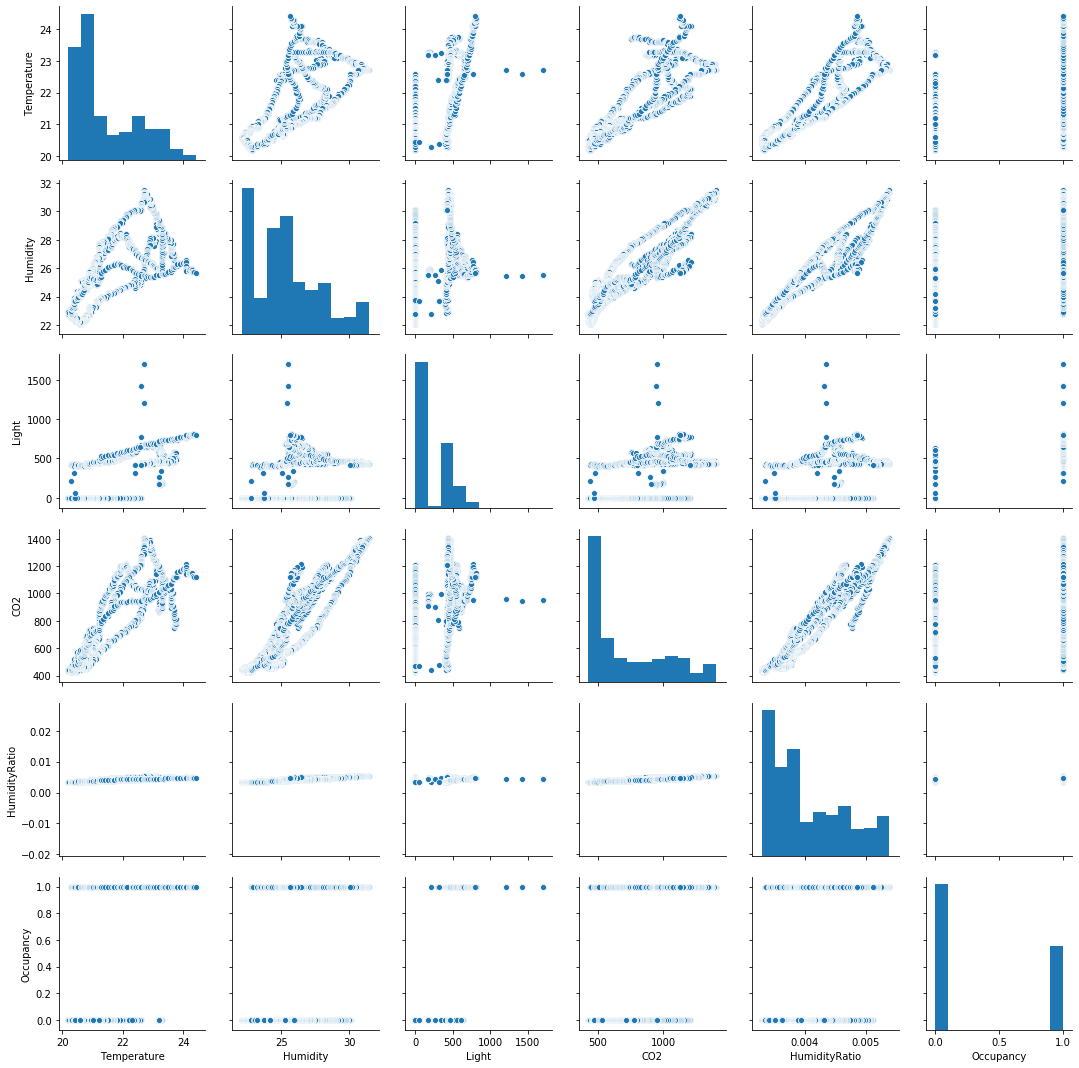

In [37]:
# create pairplot
import seaborn as sns
sns.pairplot(data_test_dateidx)
plt.show()

In [38]:
# create correlation matrix
data_test_dateidx_corr = data_test_dateidx.corr()
corr_mask = abs(data_test_dateidx.corr()) > 0.5
data_test_dateidx_corr[corr_mask]

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.000000,0.716988,0.768428,0.870226,0.894548,0.705784
Humidity,0.716988,1.000000,0.561905,0.911611,0.951914,0.610764
Light,0.768428,0.561905,1.000000,0.769167,0.693286,0.927949
CO2,0.870226,0.911611,0.769167,1.000000,0.964440,0.768030
HumidityRatio,0.894548,0.951914,0.693286,0.964440,1.000000,0.700330
Occupancy,0.705784,0.610764,0.927949,0.768030,0.700330,1.000000


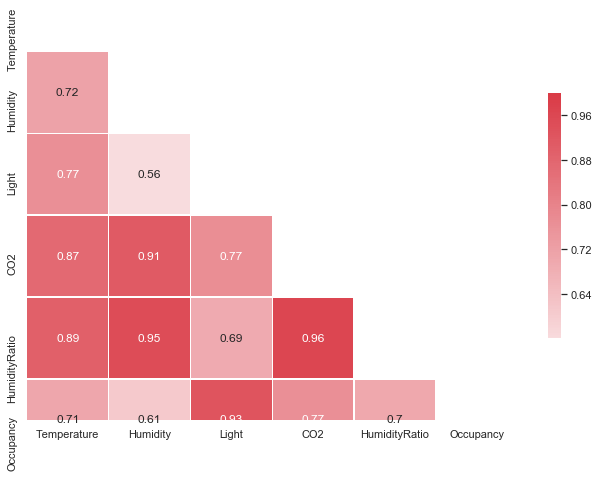

In [40]:
# create heatmap
sns.set(style="white")

# generate a mask for the upper triangle
mask = np.zeros_like(data_test_dateidx_corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220,10,as_cmap = True)

# draw the heatmap with the mask and correct aspect ration
sns.heatmap(data_test_dateidx_corr, mask = mask, cmap = cmap, center = 0.5,
           annot = True, square = True, linewidths=.5, cbar_kws={'shrink':.5})
plt.show()

In [42]:
print('Light is the feature higher correlated with occupancy.')

Light is the feature higher correlated with occupancy.


<a name="save"></a>
## Save processed data to csv file

In [43]:
data_test_dateidx.to_csv('../1_Data/clean_data/dataset1.csv')